## Parte I: Analizando la Base

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
EPH2024 = pd.read_excel('usu_individual_T124.xlsx')
EPH2004 = pd.read_stata("Individual_t104.dta")

#### 2a) Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unan ambos trimestres en una sola base

In [241]:
EPH2024BS=EPH2024[(EPH2024["AGLOMERADO"] == 32) | (EPH2024["AGLOMERADO"] == 33)]
EPH2004BS=EPH2004[(EPH2004["aglomerado"] == "Ciudad de Buenos Aires") | (EPH2004["aglomerado"] == "Partidos del GBA")]

EPH2004BS.columns = EPH2004BS.columns.str.lower()
EPH2024BS.columns = EPH2024BS.columns.str.lower()


##### Mapeo para igualar la codificación

In [245]:
#region Mapeo
mapeo = {
    'Sí': "1",
    'No': "2",
}

mapeo2 = {
    "Ciudad de Buenos Aires" : "32",
    'Partidos del GBA': "33",
}

mapeo_parentesco = {
    'Jefe': '1',
    'Cónyuge/Pareja': '2',
    'Hijo/Hijastro': '3',
    'Yerno/Nuera': '4',
    'Nieto': '5',
    'Madre/Padre': '6',
    'Suegro': '7',
    'Hermano': '8',
    'Otros Familiares': '9',
    'No Familiares': '10'
}

mapeo_estatus = {
    'Jubilado/pensionado': '1',
    'Rentista': '2',
    'Estudiante': '3',
    'Ama de casa': '4',
    'Menor de 6 años': '5',
    'Discapacitado': '6',
    'Otros': '7'
}

mapeo_cat_ocu = {
    'Patrón': '1',
    'Cuenta propia': '2',
    'Obrero o empleado': '3',
    'Trabajador familiar sin remuneración': '4',
    'Ns./Nr.': '9'
}

mapeo_sexo= {
    'Varón': '1',
    'Mujer': '2',
}

mapeo_estado_civil = {
    'Unido': '1',
    'Casado': '2',
    'Separado o Divorciado': '3',
    'Viudo': '4',
    'Soltero': '5'
}

mapeo_cobertura_medica = {
    'Obra social (incluye PAMI)': '1',
    'Mutual/Prepaga/Servicio de emergencia': '2',
    'Planes y seguros públicos': '3',
    'No paga ni le descuentan': '4',
    'Ns./Nr.': '9',
    'Obra social y mutual/prepaga/servicio de emergencia': '12',
    'Obra social y planes y seguros públicos': '13',
    'Mutual/prepaga/servicio de emergencia/planes y seguros públicos': '23',
    'Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': '123'
}

mapeo_leer= {
    'Sí': '1',
    'No': '2',
    "Menor de 2 años": "3",
    "Ns./Nr.": "0"
}

mapeo_edu= {
    'Sí, asiste': '1',
    'No asiste, pero asistió': '2',
    "Nunca asistió": "3",
    "Ns./Nr.": "9"
}

mapeo_edu2= {
    'Público': '1',
    'Privado': '2',
    "Ns./Nr.": "9"
}

mapeo_establecimiento = {
    'Jardín/Preescolar': '1',
    'Primario': '2',
    'EGB': '3',
    'Secundario': '4',
    'Polimodal': '5',
    'Terciario': '6',
    'Universitario': '7',
    'Posgrado Universitario': '8',
    'Educación especial (discapacitado)': '9',
    'Ns./Nr.': '0',
}

mapeo_edu3= {
    'Sí': '1',
    'No': '2',
    "Ns./Nr.": "9"
}


mapeo_lugar = {
    'En esta localidad': '1',
    'En otra localidad': '2',
    'En otra provincia (especificar)': '3',
    'En un país limítrofe': '4',
    'En otro país': '5',
    'No había nacido': '6',
    'Ns./Nr.': '9',
}

mapeo_nivel_educativo = {
    'Primaria Incompleta (incluye educación especial)': '1',
    'Primaria Completa': '2',
    'Secundaria Incompleta': '3',
    'Secundaria Completa': '4',
    'Superior Universitaria Incompleta': '5',
    'Superior Universitaria Completa': '6',
    'Sin instrucción': '7',
    'Ns./ Nr.': '9'
}

mapeo_cond_actividad = {
    'Entrevista individual no realizada (no respuesta al cuestion': '0',
    'Ocupado': '1',
    'Desocupado': '2',
    'Inactivo': '3',
    'Menor de 10 años': '4',
}

#endregion

In [ ]:
#region Mapeo2
EPH2004BS["aglomerado"] = EPH2004BS["aglomerado"].map(mapeo2)
EPH2004BS["h15"] = EPH2004BS["h15"].map(mapeo)
EPH2004BS["ch03"] = EPH2004BS["ch03"].map(mapeo_parentesco)
EPH2004BS["cat_inac"] = EPH2004BS["cat_inac"].map(mapeo_estatus)
EPH2004BS["cat_ocup"] = EPH2004BS["cat_ocup"].map(mapeo_cat_ocu)
EPH2004BS["ch04"] = EPH2004BS["ch04"].map(mapeo_sexo)
EPH2004BS["ch07"] = EPH2004BS["ch07"].map(mapeo_estado_civil)
EPH2004BS["ch08"] = EPH2004BS["ch08"].map(mapeo_cobertura_medica)
EPH2004BS["ch09"] = EPH2004BS["ch09"].map(mapeo_leer)
EPH2004BS["ch10"] = EPH2004BS["ch10"].map(mapeo_edu)
EPH2004BS["ch11"] = EPH2004BS["ch11"].map(mapeo_edu2)
EPH2004BS["ch12"] = EPH2004BS["ch12"].map(mapeo_establecimiento)
EPH2004BS["ch13"] = EPH2004BS["ch13"].map(mapeo_edu3)
EPH2004BS["ch15"] = EPH2004BS["ch15"].map(mapeo_lugar)
EPH2004BS["ch16"] = EPH2004BS["ch16"].map(mapeo_lugar)
EPH2004BS["nivel_ed"] = EPH2004BS["nivel_ed"].map(mapeo_nivel_educativo)
EPH2004BS["estado"] = EPH2004BS["estado"].map(mapeo_cond_actividad)

EPH2004BS["trimestre"] = 1
EPH2004BS["region"] = 1
#endregion

#### Unión

In [253]:
EPH_completo= pd.concat([EPH2004BS, EPH2024BS], ignore_index=True)
EPH_completo

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,adeccfr,pj1_1,pj2_1,pj3_1,idimpp,ch05,imputa,pondiio,pondii,pondih
0,125098,1.0,1.0,1,2004.0,1,1,S,32,1299.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
1,125397,1.0,1.0,1,2004.0,1,1,S,32,2018.0,...,00,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
2,125515,1.0,1.0,1,2004.0,1,1,S,32,1486.0,...,05,0.0,0.0,0.0,00020,NaN,NaN,NaN,NaN,NaN
3,125558,1.0,1.0,1,2004.0,1,1,S,32,1674.0,...,06,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
4,125558,1.0,2.0,1,2004.0,1,1,S,32,1674.0,...,06,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,1,1,2024.0,1,1,S,33,3410.0,...,12,NaN,NaN,NaN,NaN,1980-08-18 00:00:00,NaN,4081.0,0.0,0.0
14694,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,2,2,2024.0,1,1,S,33,3410.0,...,12,NaN,NaN,NaN,NaN,2002-03-18 00:00:00,NaN,3410.0,3410.0,0.0
14695,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,3,2,2024.0,1,1,S,33,3410.0,...,12,NaN,NaN,NaN,NaN,2004-01-03 00:00:00,NaN,3410.0,3410.0,0.0
14696,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,4,2,2024.0,1,1,S,33,3410.0,...,12,NaN,NaN,NaN,NaN,2012-05-28 00:00:00,NaN,3410.0,3410.0,0.0


#### 2b) Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas

#### 2c) Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados

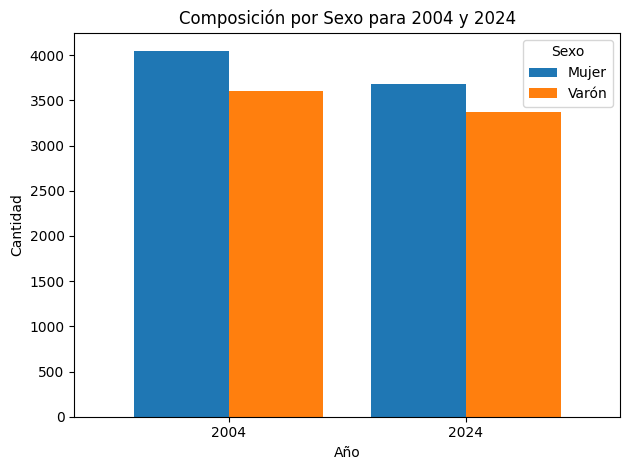

In [255]:
# Contar la cantidad de casos por sexo y año

EPH_completo["ch04"] = EPH_completo["ch04"].astype(int)
EPH_completo["ch04"] = EPH_completo["ch04"].map({1: 'Varón', 2: 'Mujer'})
EPH_completo["ano4"] = EPH_completo["ano4"].astype(int)

conteo = EPH_completo.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)

# Configuración para el gráfico
conteo.plot(kind='bar', width=0.8)

# Configuración de etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Composición por Sexo para 2004 y 2024')
plt.xticks(rotation=0)
plt.legend(title='Sexo', )

# Mostrar el gráfico
plt.tight_layout()
plt.show()

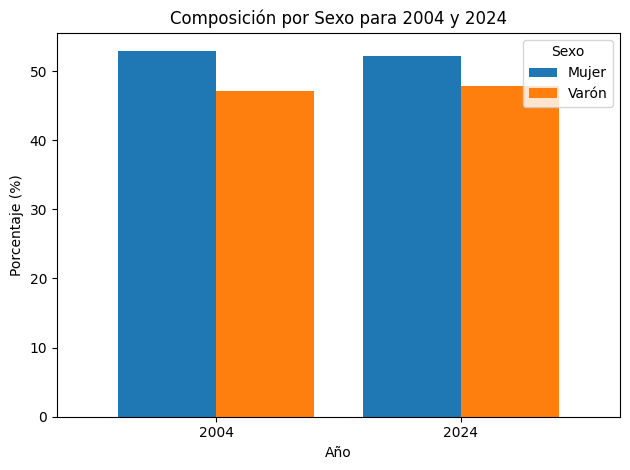

In [257]:
# Calcular el porcentaje
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Configuración para el gráfico
porcentaje.plot(kind='bar', width=0.8)

# Configuración de etiquetas y título
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.title('Composición por Sexo para 2004 y 2024')
plt.xticks(rotation=0)
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### 2d) Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF.

#### 2e) ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?